In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import reader1 as rd

In [2]:
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
DATOS = 'Datos históricos COMI 3ene16-31dic2020 semanal.csv' #Datos semanales
dataset_train = pd.read_csv(url)
# iloc (index location) extrae por filas y columnas de un dataframe dataframe.iloc[filas, columnas]
training_set = dataset_train.iloc[:, 1:2].values
cierre = rd.leer_archivo(DATOS)
#se convierten todos los valores a flotantes
cierre = cierre.astype(float)
training_set_ = cierre[:int(len(cierre) * 0.7)]
#print(training_set_)
training_set_ = np.array(training_set_)
training_set_ = np.reshape(training_set_, (training_set_.shape[0], 1))
print(f"Número de filas: {training_set.shape}")
print(f"Número de filas: {training_set_.shape}")

Número de filas: (2035, 1)
Número de filas: (182, 1)


In [3]:
dataset_train.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


# Normalización

/home/miguel/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


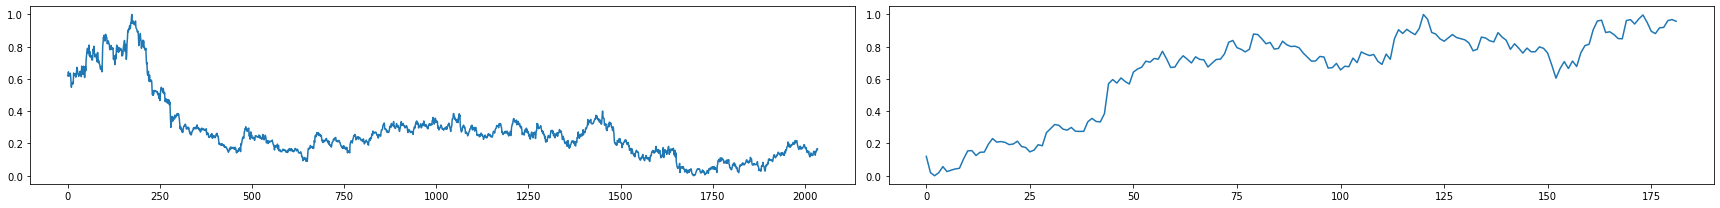

2035


In [4]:
from sklearn.preprocessing import MinMaxScaler
#Crea una instancia de la clase MinMaxScaler. El parámetro feature_range especifica el rango al cual se deben escalar los datos.
sc = MinMaxScaler(feature_range=(0,1))
#Utiliza el objeto sc para ajustar y transformar (fit_transform) el conjunto de entrenamiento original (training_set). 
# La función fit_transform calcula los parámetros necesarios para la transformación (como mínimo y máximo) 
# a partir del conjunto de entrenamiento y luego aplica la transformación.
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled_ = sc.fit_transform(training_set_)
#print(training_set_scaled)
plt.figure(figsize=(24, 3))
plt.subplot(1, 2, 1)
plt.plot(range(len(training_set_scaled)), training_set_scaled)
plt.subplot(1, 2, 2)
plt.plot(range(len(training_set_scaled_)), training_set_scaled_)

plt.tight_layout()
plt.show()

print(len(training_set_scaled))

In [5]:
X_train = []
y_train = []
time_steps = 60
N = len(training_set_scaled)

for i in range(time_steps, N):#va desde 60 hasta el numero de datos
# training_set_scaled es un arreglo de dos dimensiones (2035, 1), se van formando paquetes de 60 en 60, con un corrimiento de 1
    X_train.append(training_set_scaled[i-time_steps:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
# X_train.shape[0] = 1975, X_train.shape[1] = 60, 1975 paquetes de tamaño 60 cada uno
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))# new shape (1975, 60, 1),

In [6]:
X_train_ = []
y_train_ = []

time_steps_ = 8
N_ = len(training_set_scaled_)

for i in range(time_steps_, N_): 
    X_train_.append(training_set_scaled_[i-time_steps_:i, 0])
    y_train_.append(training_set_scaled_[i, 0])
print(np.array(X_train_).shape)

X_train_, y_train_ = np.array(X_train_), np.array(y_train_)
X_train_ = np.reshape(X_train_, (X_train_.shape[0], X_train_.shape[1], 1))
print(X_train_.shape) # new shape (1975, 60, 1), 

(174, 8)
(174, 8, 1)


In [7]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

2023-11-26 13:55:05.902126: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-26 13:55:05.939445: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-26 13:55:05.939485: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-26 13:55:05.939516: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-26 13:55:05.947613: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-26 13:55:05.948664: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [8]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
# Compila el modelo utilizando el optimizador Adam y la función de pérdida de error cuadrático medio (mean squared error).
model.compile(optimizer='adam',loss='mean_squared_error')
# Entrena el modelo con los datos de entrada X_train y las etiquetas y_train.
model.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
62/62 [==============================] - 9s 57ms/step - loss: 0.0109
Epoch 2/100
62/62 [==============================] - 4s 60ms/step - loss: 0.0030
Epoch 3/100
62/62 [==============================] - 4s 69ms/step - loss: 0.0028
Epoch 4/100
62/62 [==============================] - 4s 69ms/step - loss: 0.0022
Epoch 5/100
62/62 [==============================] - 5s 75ms/step - loss: 0.0027
Epoch 6/100
62/62 [==============================] - 4s 72ms/step - loss: 0.0020
Epoch 7/100
62/62 [==============================] - 4s 65ms/step - loss: 0.0020
Epoch 8/100
62/62 [==============================] - 5s 82ms/step - loss: 0.0021
Epoch 9/100
62/62 [==============================] - 5s 87ms/step - loss: 0.0019
Epoch 10/100
62/62 [==============================] - 5s 87ms/step - loss: 0.0023
Epoch 11/100
62/62 [==============================] - 6s 100ms/step - loss: 0.0018
Epoch 12/100
62/62 [==============================] - 6s 103ms/step - loss: 0.0022
Epoch 13/100
62/62 [===

In [9]:
modelo_ = Sequential()
modelo_.add(LSTM(units=50,return_sequences=True,input_shape=(X_train_.shape[1], 1)))
modelo_.add(Dropout(0.2))
modelo_.add(LSTM(units=50,return_sequences=True))
modelo_.add(Dropout(0.2))
modelo_.add(LSTM(units=50,return_sequences=True))
modelo_.add(Dropout(0.2))
modelo_.add(LSTM(units=50))
modelo_.add(Dropout(0.2))
modelo_.add(Dense(units=1))
# Compila el modelo utilizando el optimizador Adam y la función de pérdida de error cuadrático medio (mean squared error).
modelo_.compile(optimizer='adam',loss='mean_squared_error')
# Entrena el modelo con los datos de entrada X_train y las etiquetas y_train.
modelo_.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100


ValueError: in user code:

    File "/home/miguel/anaconda3/lib/python3.9/site-packages/keras/src/engine/training.py", line 1377, in train_function  *
        return step_function(self, iterator)
    File "/home/miguel/anaconda3/lib/python3.9/site-packages/keras/src/engine/training.py", line 1360, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/miguel/anaconda3/lib/python3.9/site-packages/keras/src/engine/training.py", line 1349, in run_step  **
        outputs = model.train_step(data)
    File "/home/miguel/anaconda3/lib/python3.9/site-packages/keras/src/engine/training.py", line 1126, in train_step
        y_pred = self(x, training=True)
    File "/home/miguel/anaconda3/lib/python3.9/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/miguel/anaconda3/lib/python3.9/site-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 8, 1), found shape=(None, 60, 1)


In [10]:
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/tatatest.csv'
dataset_test = pd.read_csv(url)
real_stock_price = dataset_test.iloc[:, 1:2].values
real_stock_price_ = cierre_p = cierre[int(len(cierre) * 0.7):]

In [11]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


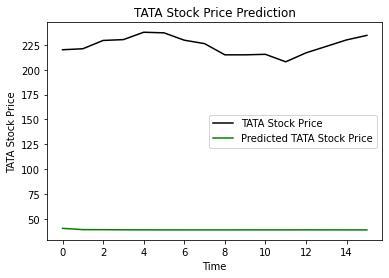

In [12]:
plt.plot(real_stock_price, color = 'black', label = 'TATA Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()